In [1]:
import pandas as pd

In [3]:
datos = pd.read_csv("Absorbancia_VeMN15g_limpio.csv")

In [4]:
datos.head()

,nm,A
0,190.0,NaN
1,190.5,NaN
2,191.0,NaN
3,191.5,NaN
4,192.0,1.699


In [5]:
datos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 821 entries, 0 to 820
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   nm      821 non-null    float64
 1   A       813 non-null    float64
dtypes: float64(2)
memory usage: 13.0 KB


In [6]:
x=datos["nm"]
y=datos["A"]

x
y

0        NaN
1        NaN
2        NaN
3        NaN
4      1.699
       ...  
816    0.030
817      NaN
818      NaN
819      NaN
820      NaN
Name: A, Length: 821, dtype: float64

In [7]:
type(x)

pandas.core.series.Series

In [8]:
type(y)

pandas.core.series.Series

In [9]:
y

0        NaN
1        NaN
2        NaN
3        NaN
4      1.699
       ...  
816    0.030
817      NaN
818      NaN
819      NaN
820      NaN
Name: A, Length: 821, dtype: float64

In [10]:
x


0      190.0
1      190.5
2      191.0
3      191.5
4      192.0
       ...  
816    598.0
817    598.5
818    599.0
819    599.5
820    600.0
Name: nm, Length: 821, dtype: float64

In [18]:
x.describe()

count    821.00000
mean     395.00000
std      118.57329
min      190.00000
25%      292.50000
50%      395.00000
75%      497.50000
max      600.00000
Name: nm, dtype: float64

In [20]:
y.describe()

count    813.000000
mean       0.285272
std        0.311879
min        0.021000
25%        0.036000
50%        0.131000
75%        0.491000
max        1.699000
Name: A, dtype: float64

array([[<Axes: title={'center': 'nm'}>, <Axes: title={'center': 'A'}>]],
      dtype=object)

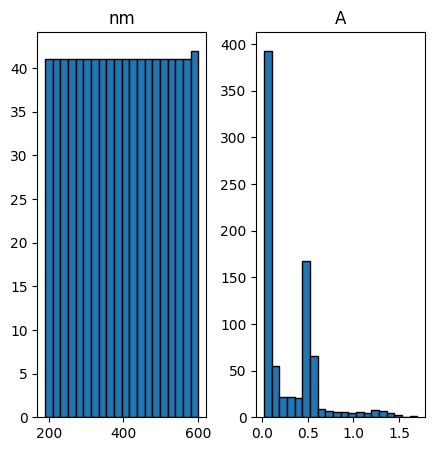

In [16]:
datos.hist(figsize=(5,5), bins=20, edgecolor="black", grid=False)

<Axes: xlabel='nm', ylabel='A'>

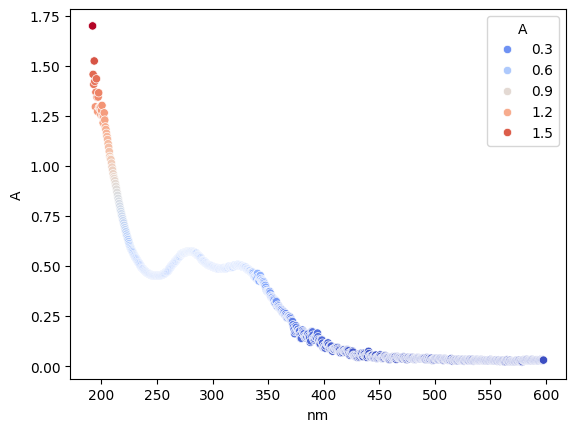

In [12]:
import seaborn as sb 
sb.scatterplot(x=x, y=y, data=datos, hue="A", palette="coolwarm")

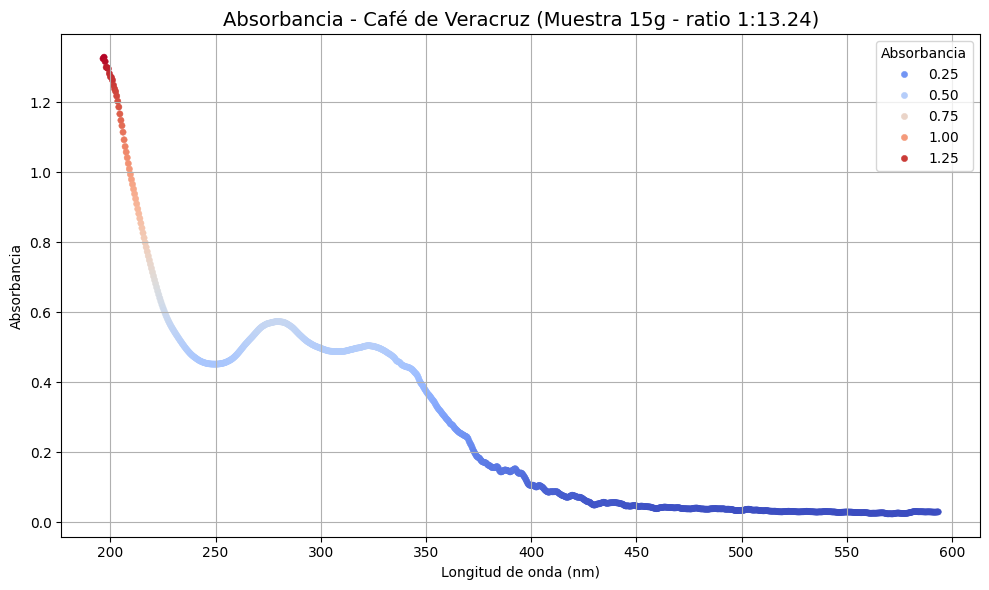

In [22]:
from scipy.signal import savgol_filter
import matplotlib.pyplot as plt
import seaborn as sb

# creamos columna suavizada

datos["A_suave"]=savgol_filter(datos["A"], window_length=19, polyorder=3)

#graficamos el scatterplot con suavizado y gradiente de color

plt.figure(figsize=(10,6))
sb.scatterplot(x="nm", y="A_suave", data =datos, hue="A_suave", palette="coolwarm", s=20, edgecolor=None)
plt.title("Absorbancia - Café de Veracruz (Muestra 15g - ratio 1:13.24)", fontsize=14)
plt.xlabel("Longitud de onda (nm)")
plt.ylabel("Absorbancia")
plt.legend(title='Absorbancia', loc='best')
plt.grid(True)
plt.tight_layout()
plt.show()